In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
import easyocr
import datetime
import re

%matplotlib inline

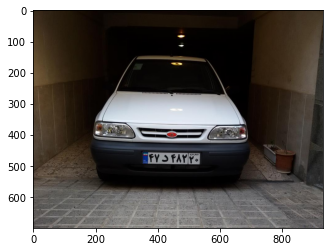

In [3]:
carplate_img = cv2.imread("test1/expo3358299/TamamrokhJolo.jpg")
carplate_img_rgb = cv2.cvtColor(carplate_img, cv2.COLOR_BGR2RGB)
plt.imshow(carplate_img_rgb)

In [4]:
start = datetime.datetime.now()
reader = easyocr.Reader(['fa']) # need to run only once to load model into memory
result = reader.readtext(carplate_img_rgb, detail = 1)
end = datetime.datetime.now()

print(end - start)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


0:00:22.311157


٤٨٢٢٠ ٥ ٤٧


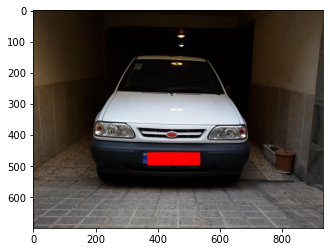

In [5]:
res = False
pattern = '\d*[\u0600-\u06FF]\d*'
prog = re.compile(pattern)

for i, r in enumerate(result):
    if prog.match(r[1]):
        print(r[1])
        pnt = np.array(r[0], np.int)
        pnt = pnt.reshape((-1, 1, 2))
        isClosed = True
        color = (255, 0, 0)
        thickness = 2

        carplate_img_rgb = cv2.fillPoly(carplate_img_rgb, [pnt], 255) 
                              #isClosed, color, thickness)
        plt.imshow(carplate_img_rgb)

In [6]:
logo_frame = carplate_img_rgb[carplate_img_rgb==[255,0,0]] 
pnt = []
for i, r in enumerate(result):
    pnt.append(r[0])

pnt = np.array(pnt, dtype=int)    
pnt = pnt.reshape(-1,2)
pnt

array([[367, 457],
       [537, 457],
       [537, 497],
       [367, 497]])

In [7]:
pnt1 = (min(pnt[:,1]), min(pnt[:,0]))
pnt2 = (max(pnt[:,1]), max(pnt[:,0]))

print(pnt1, pnt2)

(457, 367) (497, 537)


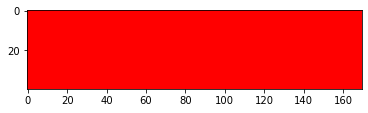

In [8]:
plt.imshow(carplate_img_rgb[pnt1[0]:pnt2[0], pnt1[1]:pnt2[1]])

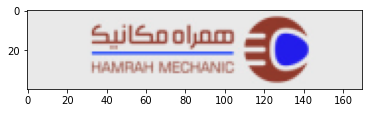

In [9]:
dim = (pnt2[1]-pnt1[1], pnt2[0]-pnt1[0])
logo = cv2.imread("ham.jpg")
resized = cv2.resize(logo, dim, interpolation = cv2.INTER_AREA)
plt.imshow(resized)

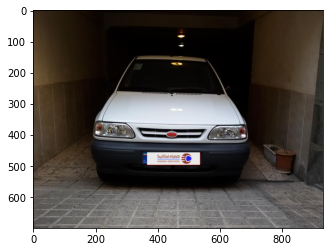

In [10]:
carplate_img_rgb[pnt1[0]:pnt2[0], pnt1[1]:pnt2[1]] = resized
plt.imshow(carplate_img_rgb)